# MUSTlink test

In [1]:
from mustlink import mustlink
%matplotlib inline

Instantiate the Must() class - by default this will look for a configuration file, and load user authentication if found. Otherwise specify `config_file` and `url`:

## Connecting to the server

In [26]:
mustlink.Must?

Init signature:
mustlink.Must(
    url='https://bepicolombo.esac.esa.int/webclient-must/mustlink',
    config_file='/home/mbentley/.config/mustlink.yml',
)
Docstring:      <no docstring>
Init docstring:
The WebMUST URL instance can be specified, along with a
YAML config file containing a user section with login and
password entries. If neither of these are provided, the
default values are used
File:           ~/Dropbox/work/bepi/software/mustlink/mustlink/mustlink.py
Type:           type
Subclasses:     


In [27]:
must = mustlink.Must()

INFO 2020-06-17 16:22:49 (mustlink.mustlink): user mbentley currently logged in
INFO 2020-06-17 16:22:49 (mustlink.mustlink): 6 providers found


## Working with providers

The list of providers (essentially separate databases) is updated on log-in and stored in the `providers` attribute:

In [3]:
must.providers

['BEPICRUISE', 'BEPIMAGNETIC', 'BEPIMST', 'BEPISVT1B', 'BEPISVT1C', 'BEPITEST']

The provider can be included in most calls, but if you only plan to work with one, this can be set by default using the `set_provider` call:

In [28]:
must.set_provider('BEPICRUISE')

## Working with tables

As well as parameter (TM/TC) data, a provider can also offer tables, for example the Telecommand History. The list is populated using `get_tables()` and stored in the `tables` attribute:

In [29]:
must.get_tables()

INFO 2020-06-17 16:24:37 (mustlink.mustlink): provider BEPICRUISE has 1 table(s)


In [30]:
must.tables

{'BEPICRUISE': [{'dataType': 'TC', 'tableTitle': 'BEPICRUISE TC History'}]}

Information about a given table can be dumped with `get_table_meta()`:

In [7]:
must.get_table_meta('TC')

{'headers': ['Name',
  'Description',
  'Type',
  'Subtype',
  'Sequence',
  'Release Time',
  'Execution Time',
  'S',
  'D',
  'C',
  'G',
  'B',
  'IL',
  'ST',
  'R',
  'GTO',
  'A',
  'SS',
  '1122',
  'CC',
  'Parameters'],
 'tableName': 'BEPICRUISE TC History'}

And values from this table retrieved with `get_table_data()`, including a time range:

In [36]:
must.get_table_data?

Signature:
must.get_table_data(
    table,
    start_time=None,
    stop_time=None,
    search_key='name',
    search_text='',
    provider=None,
    max_rows=1000,
    quiet=False,
)
Docstring:
Retrieve tabular data from a WebMUST provider and format into a pandas
DataFrame. Columns with 'time' in the title are assumed to be times, and 
are accordingly converted to Timestamps. Setting max_rows limits the number
of rows returned by the API (when this is excluded the API returns a maximum
of 5000)
File:      ~/Dropbox/work/bepi/software/mustlink/mustlink/mustlink.py
Type:      method


In [37]:
tch = must.get_table_data('TC', '2019-05-01 00:00:00', '2019-05-02 00:00:00') 

INFO 2020-06-17 16:27:40 (mustlink.mustlink): 18 table entries retrieved


In [38]:
tch.head()

,Name,Description,Type,Subtype,Sequence,Release Time,Execution Time,S,D,C,...,B,IL,ST,R,GTO,A,SS,1122,CC,Parameters
0,ZCPA17CE,AOCS tcHgaSetFixedAng,129,1,AACF264A,2019-04-11 18:58:05.430,2019-05-01 09:00:30,D,D,E,...,,NONE\/M,,S,SSS,U,,,US,None
1,ZCA0A166,AOCS Determine Hga guidance ET/fixed,161,102,AACF262A,2019-04-11 18:58:05.430,2019-05-01 09:00:35,D,D,E,...,,NONE\/M,,S,SSS,U,,,US,None
2,ZCA08A73,AOCS SegTab Load ShmAtGuidCheb Seg Ram,138,115,AACF140A,2019-04-11 18:58:05.430,2019-05-01 09:01:00,D,D,E,...,,NONE\/M,,S,SSS,U,,,US,None
3,ZCA08A74,AOCS SegTab Load ShmAtGdCosSin SegP1 Ram,138,116,AACF151A,2019-04-11 18:58:05.430,2019-05-01 09:01:01,D,D,E,...,,NONE\/M,,S,SSS,U,,,US,None
4,ZCA08A75,AOCS SegTab Load ShmAtGdCosSin SegP2 Ram,138,117,AACF151A,2019-04-11 18:58:05.430,2019-05-01 09:01:02,D,D,E,...,,NONE\/M,,S,SSS,U,,,US,None


In [39]:
tch.iloc[0]

Name                                ZCPA17CE
Description            AOCS tcHgaSetFixedAng
Type                                     129
Subtype                                    1
Sequence                            AACF264A
Release Time      2019-04-11 18:58:05.430000
Execution Time           2019-05-01 09:00:30
S                                          D
D                                          D
C                                          E
G                                           
B                                           
IL                                   NONE\/M
ST                                          
R                                          S
GTO                                      SSS
A                                          U
SS                                          
1122                                        
CC                                        US
Parameters                              None
Name: 0, dtype: object

## Working with parameters

Parameters can be searched by either name (mnemonic) or description using `search_parameter()`

In [40]:
must.search_parameter?

Signature: must.search_parameter(search_text, search_by='description', provider=None)
Docstring:
The provided searche text is used to search within the parameter
descriptions. Matching parameters are returned in a Pandas DataFrame.

Search can be by name (mnemonic) or description. 

Set search_by='name' or 'description'
File:      ~/Dropbox/work/bepi/software/mustlink/mustlink/mustlink.py
Type:      method


In [41]:
params = must.search_parameter('BERM')

INFO 2020-06-17 16:28:27 (mustlink.mustlink): 23 parameters match search text: BERM


/home/mbentley/miniconda3/envs/bepi/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [42]:
params

,Description,Data Type,First Sample,Last Sample,Subsystem,Id,Parameter Type,Name,Provider,Unit
0,BERM Busy,UNSIGNED_TINY_INT,2018-10-25 18:02:29,2020-04-24 19:09:06,berm,2866,TM,NBED0009,BEPICRUISE,NaN
1,MPO-TEMP-BERM-TRP,DOUBLE,NaT,NaT,,30150,TM,NKK19001,BEPICRUISE,degC
2,BERM LCL current,DOUBLE,NaT,NaT,,30151,TM,NKK19002,BEPICRUISE,A
3,BERM mode,UNSIGNED_MEDIUM_INT,NaT,NaT,,30152,TM,NKK19003,BEPICRUISE,NaN
4,BERM-A ON-ST,UNSIGNED_TINY_INT,2018-10-19 18:19:23,2020-06-17 11:58:23,,34093,TM,NPWD0403,BEPICRUISE,NaN
5,BERM-B ON-ST,UNSIGNED_TINY_INT,2018-10-19 18:19:23,2020-06-17 11:58:23,,34132,TM,NPWD0603,BEPICRUISE,NaN
6,BERM-A ON-CT,DOUBLE,2018-10-19 18:19:23,2020-06-17 11:58:23,,34381,TM,NPWD2803,BEPICRUISE,A
7,BERM-B ON-CT,DOUBLE,2018-10-19 18:19:23,2020-06-17 11:58:23,,34422,TM,NPWD3203,BEPICRUISE,A
8,BERM-A ON-CT,UNSIGNED_MEDIUM_INT,2018-10-19 18:19:23,2020-06-17 11:58:23,,34601,TM,NPWU2803,BEPICRUISE,NaN
9,BERM-B ON-CT,UNSIGNED_MEDIUM_INT,2018-10-19 18:19:23,2020-06-17 11:58:23,,34635,TM,NPWU3203,BEPICRUISE,NaN


In [47]:
must.search_parameter('NBE', search_by='name').head()

INFO 2020-06-17 16:30:38 (mustlink.mustlink): 144 parameters match search text: NBE


/home/mbentley/miniconda3/envs/bepi/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Description,Data Type,First Sample,Last Sample,Subsystem,Id,Parameter Type,Name,Provider,Unit
0,BC Status Word,UNSIGNED_MEDIUM_INT,2018-10-25 18:17:05,2019-03-29 19:36:15,berm,2855,TM,NBE22911,BEPICRUISE,NaN
1,1553 bus type,UNSIGNED_TINY_INT,2018-10-25 18:17:05,2019-03-29 19:36:15,berm,2856,TM,NBE22912,BEPICRUISE,NaN
2,Number of data words,UNSIGNED_MEDIUM_INT,2018-10-25 18:17:05,2019-03-29 19:36:15,berm,2857,TM,NBE22914,BEPICRUISE,NaN
3,CMD Counter,UNSIGNED_MEDIUM_INT,2018-10-25 18:02:29,2020-04-24 19:09:06,berm,2858,TM,NBED0001,BEPICRUISE,NaN
4,CMD Size,UNSIGNED_TINY_INT,2018-10-25 18:02:29,2020-04-24 19:09:06,berm,2859,TM,NBED0002,BEPICRUISE,NaN


Having identified a parameter of interest, the `get_data()` function will return parameter values for a given time range.

In [44]:
must.get_data?

Signature:
must.get_data(
    param_name,
    start_time=None,
    stop_time=None,
    provider=None,
    calib=False,
    max_pts=None,
)
Docstring:
Requests data for a given parameter and time-range. Minimal checking is 
currently performed on the times and return codes. Data are formatted into
a Pandas DataFrame with time conversion to UTC performed
File:      ~/Dropbox/work/bepi/software/mustlink/mustlink/mustlink.py
Type:      method


In [45]:
%time data = must.get_data(param_name='NRUG1076', start_time='2019-02-01 00:00:00', stop_time='2019-02-28 00:00:00', calib=False)

INFO 2020-06-17 16:30:20 (mustlink.mustlink): 8038 values retrieved
CPU times: user 54 ms, sys: 5.12 ms, total: 59.1 ms
Wall time: 307 ms


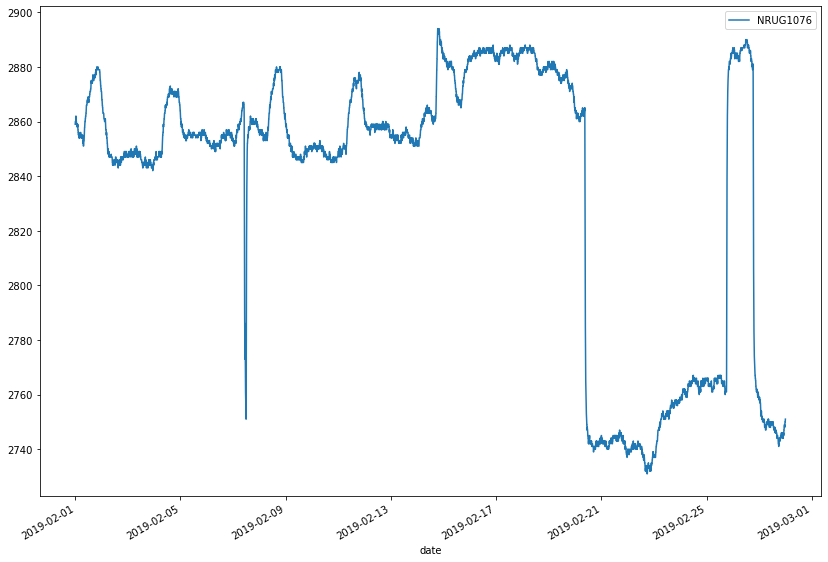

In [46]:
ax = data.plot(figsize=(14,10))

In [48]:
params = must.search_parameter('speed')
params[params.Subsystem=='AOCS']

INFO 2020-06-17 16:30:47 (mustlink.mustlink): 60 parameters match search text: speed


/home/mbentley/miniconda3/envs/bepi/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Description,Data Type,First Sample,Last Sample,Subsystem,Id,Parameter Type,Name,Provider,Unit
0,Speed Profile S value,UNSIGNED_INT,NaT,NaT,AOCS,4206,TM,NCAC0065,BEPICRUISE,NaN
1,Speed Profile duration,UNSIGNED_INT,2018-10-19 18:20:54,2020-06-17 07:13:02,AOCS,9964,TM,NCADAB94,BEPICRUISE,NaN
2,Speed Profile duration,UNSIGNED_INT,2018-10-19 18:20:54,2020-06-17 07:13:02,AOCS,9968,TM,NCADABA4,BEPICRUISE,NaN
3,Speed Profile duration,UNSIGNED_INT,2018-10-19 18:20:54,2020-06-17 07:13:02,AOCS,9972,TM,NCADABB4,BEPICRUISE,NaN
4,Speed Profile duration,UNSIGNED_INT,2018-10-19 18:20:54,2020-06-17 07:13:02,AOCS,9976,TM,NCADABC4,BEPICRUISE,NaN
5,Speed limitation state,UNSIGNED_INT,2018-10-19 18:19:16,2020-06-17 11:58:20,AOCS,12052,TM,NCAT4540,BEPICRUISE,NaN
6,Speed limitation state,UNSIGNED_INT,2018-10-19 18:19:16,2020-06-17 11:58:20,AOCS,12068,TM,NCAT4B70,BEPICRUISE,NaN
7,Is trq cmd / speed cmd,UNSIGNED_TINY_INT,2018-10-19 18:19:16,2020-06-17 11:58:04,AOCS,12093,TM,NCAT6B20,BEPICRUISE,NaN
8,Filt dur nz speed surv,FLOAT,2018-10-19 18:20:54,2020-06-17 07:13:02,AOCS,12107,TM,NCAT7220,BEPICRUISE,s
9,Filt dur over speed surv,FLOAT,2018-10-19 18:20:54,2020-06-17 07:13:02,AOCS,12108,TM,NCAT7230,BEPICRUISE,s


In [49]:
must.get_param_info('NCATABD0')

INFO 2020-06-17 16:30:51 (mustlink.mustlink): parameter info for Rw1 speed extracted


Description                 Rw1 speed
Data Type                       FLOAT
First Sample      2018-10-20 00:21:51
Last Sample       2020-06-17 11:58:39
Subsystem                        AOCS
Id                              12378
Unit                             rd/s
Parameter Type                     TM
Name                         NCATABD0
Provider                   BEPICRUISE
dtype: object

In [51]:
%time data = must.get_data(param_name='NCATABD0', start_time='2019-02-01 00:00:00', stop_time='2019-02-28 00:00:00', calib=False)

INFO 2020-06-17 16:31:20 (mustlink.mustlink): 546525 values retrieved
CPU times: user 1.87 s, sys: 247 ms, total: 2.12 s
Wall time: 12.6 s


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 546525 entries, 2019-02-01 00:00:09.678000 to 2019-02-27 23:59:53.237000
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   NCATABD0  546525 non-null  float64
dtypes: float64(1)
memory usage: 8.3 MB


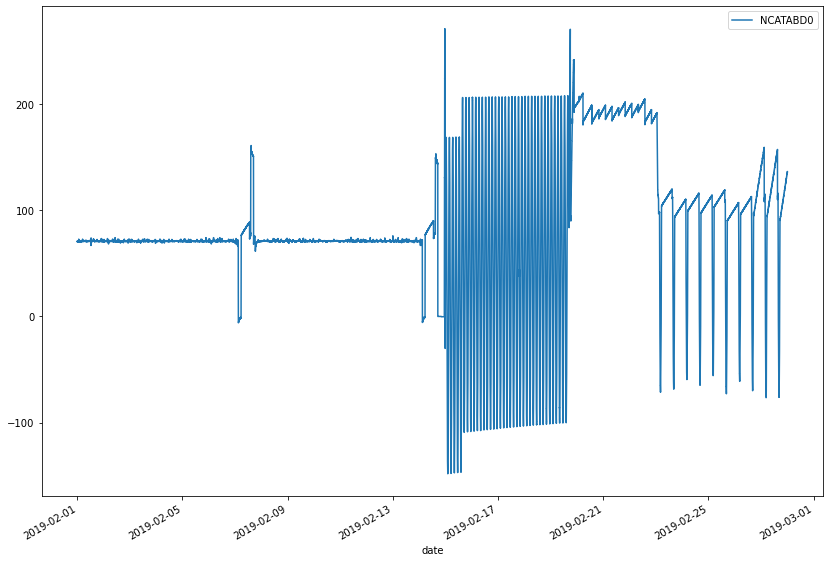

In [21]:
ax = data.plot(figsize=(14,10))

This returned a *lot* of values. If you don't need them all, you can limit the returned parameters using `max_pts`. For example:

In [53]:
%time data = must.get_data(param_name='NCATABD0', start_time='2019-02-01 00:00:00', stop_time='2019-02-28 00:00:00', calib=False, max_pts=1000)

INFO 2020-06-17 16:32:38 (mustlink.mustlink): 2000 values retrieved
CPU times: user 30.5 ms, sys: 2.87 ms, total: 33.4 ms
Wall time: 5.01 s


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2000 entries, 2019-02-01 00:07:59.678000 to 2019-02-27 23:59:13.237000
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NCATABD0  2000 non-null   float64
dtypes: float64(1)
memory usage: 31.2 KB


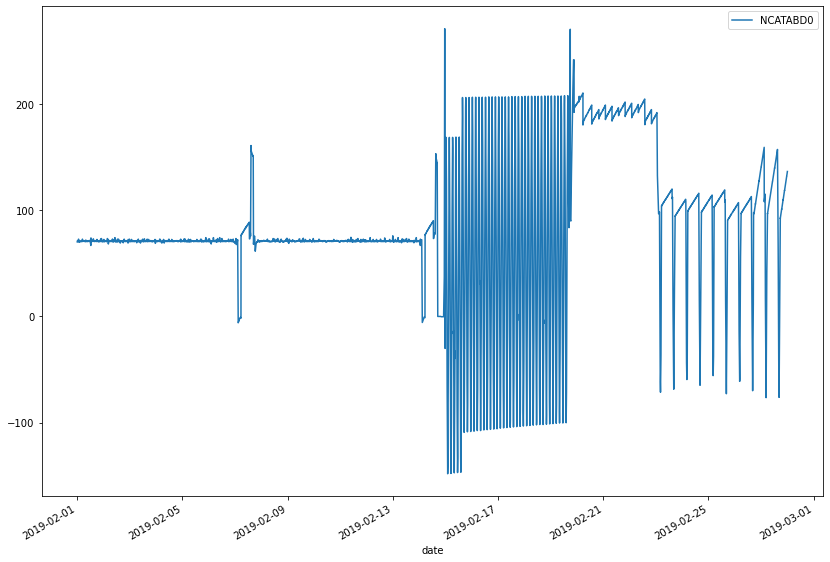

In [55]:
ax = data.plot(figsize=(14,10))

There is also a basic plot function built in which wrapped up the call to retrieve data and tries to pretty print the results:

INFO 2020-06-17 16:33:45 (mustlink.mustlink): parameter info for Rw1 speed extracted
INFO 2020-06-17 16:33:48 (mustlink.mustlink): 2000 values retrieved


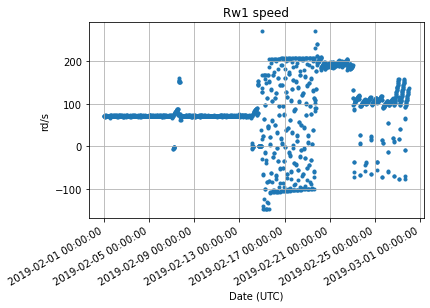

In [56]:
ax = must.plot_data(param_name='NCATABD0', start_time='2019-02-01 00:00:00', stop_time='2019-02-28 00:00:00', max_pts=1000)